In [1]:
!pip install kaleido

import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
import numpy as np
import pandas as pd

from pathlib import Path

from librep.datasets.har.loaders import PandasMultiModalLoader
from librep.utils.visualization.multimodal_har import plot_windows_sample, plot_twin_windows_sample, plot_windows_single_line

root_dir = Path("./data/processed/")
kuhar_path = root_dir / "KuHar" / "selected_balanced"
kuhar_normalized_path = root_dir / "KuHar" / "selected_balanced_normalized"

In [3]:
train, val, test = PandasMultiModalLoader(kuhar_path, download=False).load(label=["user", "serial", "standard activity code"])
train_normalized, val_normalized, test_normalized = PandasMultiModalLoader(kuhar_normalized_path, download=False).load(label=["user", "serial", "standard activity code"])
np.all(train.windows("accel-y")[0][1] == train_normalized.windows("accel-y")[0][1])

True

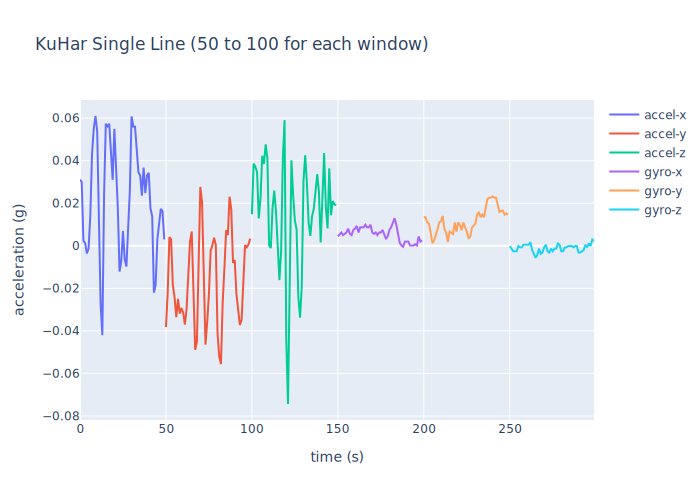

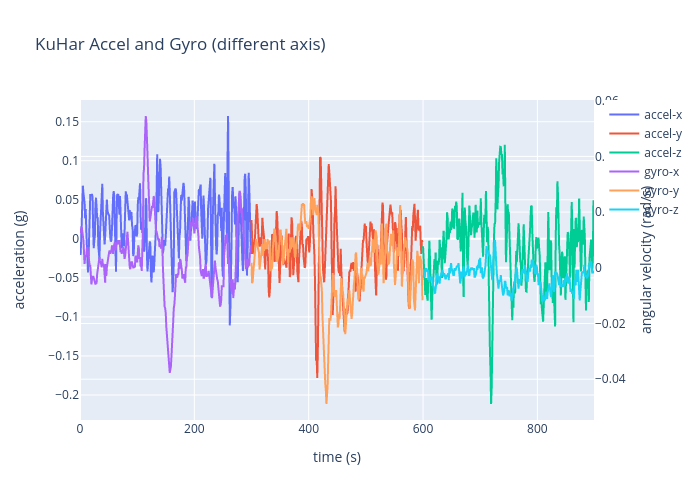

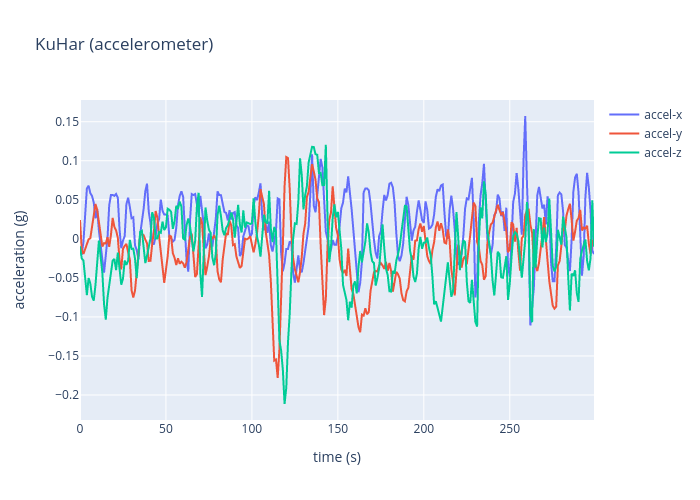

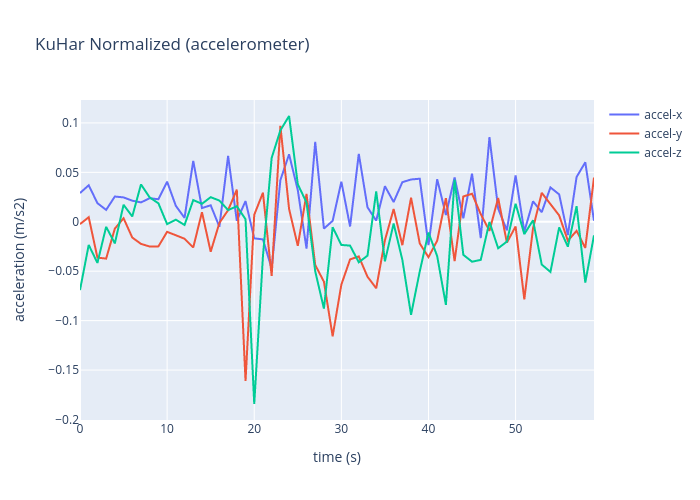

In [7]:
plot_windows_single_line(
    train,
    windows=None, #["accel-x", "accel-y", "accel-z", "gyro-x", "gyro-y", "gyro-z"],
    sample_idx=0,
    the_slice=slice(50, 100, 1),
    title="KuHar Single Line (50 to 100 for each window)",
    xaxis="time (s)",
    yaxis="acceleration (g)",
).show("svg")

plot_twin_windows_sample(
    train,
    sample_idx=0,
    title="KuHar Accel and Gyro (different axis)",
    xaxis="time (s)",
    y1_axis="acceleration (g)",
    y2_axis="angular velocity (rad/s)",
    # the_slice=slice(0, 300, 1),
).show("png")

plot_windows_sample(
    train,
    windows=["accel-x", "accel-y", "accel-z"],
    sample_idx=0,
    title="KuHar (accelerometer)",
    xaxis="time (s)",
    yaxis="acceleration (g)",
    the_slice=slice(0, 300, 1),
).show("png")

plot_windows_sample(
    train_normalized,
    windows=["accel-x", "accel-y", "accel-z"],
    sample_idx=0,
    title="KuHar Normalized (accelerometer)",
    xaxis="time (s)",
    yaxis="acceleration (m/s2)",
).show("png")
